# Load e instalação de bibliotecas necessárias

In [124]:
import math
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import plotly.express as px
%matplotlib inline
#for box-cox transformation
from scipy import stats
#for min-max scaling
from mlxtend.preprocessing import minmax_scaling
#NLP
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import nltk
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
nltk.download('stopwords')
nltk.download('wordnet')

nltk.download('punkt')
#Loading the libraries for prediction
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor




warnings.simplefilter("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jonatashalliday/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jonatashalliday/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jonatashalliday/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Carregando os dados

In [2]:
file_path = 'teste_indicium_precificacao.csv'

In [3]:
df_houses = pd.read_csv(file_path, delimiter = ',')

In [4]:
df_houses.head()

id                                              nome  host_id  \
0  2595                             Skylit Midtown Castle     2845   
1  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
2  3831                   Cozy Entire Floor of Brownstone     4869   
3  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
4  5099         Large Cozy 1 BR Apartment In Midtown East     7322   

     host_name bairro_group        bairro  latitude  longitude  \
0     Jennifer    Manhattan       Midtown  40.75362  -73.98377   
1    Elisabeth    Manhattan        Harlem  40.80902  -73.94190   
2  LisaRoxanne     Brooklyn  Clinton Hill  40.68514  -73.95976   
3        Laura    Manhattan   East Harlem  40.79851  -73.94399   
4        Chris    Manhattan   Murray Hill  40.74767  -73.97500   

         room_type  price  minimo_noites  numero_de_reviews ultima_review  \
0  Entire home/apt    225              1                 45    2019-05-21   
1     Private room    150              3                  0           NaN   
2  Entire home/apt     89              1                270    2019-07-05   
3  Entire home/apt     80             10                  9    2018-11-19   
4  Entire home/apt    200              3                 74    2019-06-22   

   reviews_por_mes  calculado_host_listings_count  disponibilidade_365  
0             0.38                              2                  355  
1              NaN                              1                  365  
2             4.64                              1                  194  
3             0.10                              1                    0  
4             0.59                              1                  129

In [5]:
df_houses.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [6]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [7]:
df_houses.shape

(48894, 16)

In [8]:
df_houses.describe()

id       host_id      latitude     longitude         price  \
count  4.889400e+04  4.889400e+04  48894.000000  48894.000000  48894.000000   
mean   1.901753e+07  6.762139e+07     40.728951    -73.952169    152.720763   
std    1.098288e+07  7.861118e+07      0.054529      0.046157    240.156625   
min    2.595000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.472371e+06  7.822737e+06     40.690100    -73.983070     69.000000   
50%    1.967743e+07  3.079553e+07     40.723075    -73.955680    106.000000   
75%    2.915225e+07  1.074344e+08     40.763117    -73.936273    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimo_noites  numero_de_reviews  reviews_por_mes  \
count   48894.000000       48894.000000     38842.000000   
mean        7.030085          23.274758         1.373251   
std        20.510741          44.550991         1.680453   
min         1.000000           0.000000         0.010000   
25%         1.000000           1.000000         0.190000   
50%         3.000000           5.000000         0.720000   
75%         5.000000          24.000000         2.020000   
max      1250.000000         629.000000        58.500000   

       calculado_host_listings_count  disponibilidade_365  
count                   48894.000000         48894.000000  
mean                        7.144005           112.776169  
std                        32.952855           131.618692  
min                         1.000000             0.000000  
25%                         1.000000             0.000000  
50%                         1.000000            45.000000  
75%                         2.000000           227.000000  
max                       327.000000           365.000000

## Data preparation

Distribuição dos preços

In [9]:
df_houses['price']

0        225
1        150
2         89
3         80
4        200
        ... 
48889     70
48890     40
48891    115
48892     55
48893     90
Name: price, Length: 48894, dtype: int64

<Figure size 800x400 with 0 Axes>

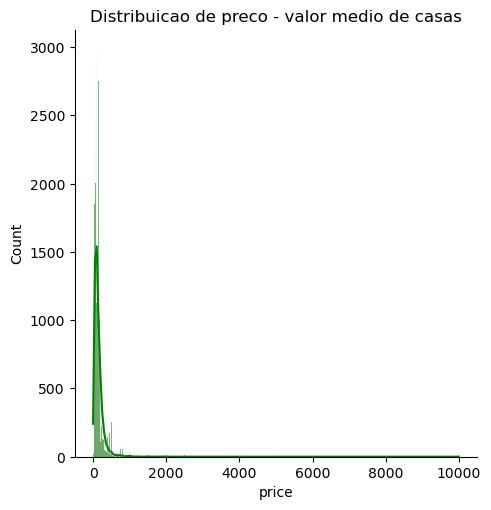

In [10]:
df_houses['price']

plt.figure(figsize= [8, 4])
sns.displot(df_houses['price'], color = 'g', kde = True)
plt.title('Distribuicao de preco - valor medio de casas')
plt.show()

Haverá a necessidade de normalizar a curva de preco, de forma que mude o range dos dados.

In [11]:
#price_normalized = stats.boxcox(df_houses['price'])
(df_houses['price'] < 0).values.any()

False

In [12]:
df_houses[df_houses['price'] == df_houses['price'].min()]

id                                               nome    host_id  \
23160  18750597  Huge Brooklyn Brownstone Living, Close to it all.    8993084   
25432  20333471      ★Hostel Style Room | Ideal Traveling Buddies★  131697576   
25633  20523843    MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)   15787004   
25752  20608117                    Sunny, Quiet Room in Greenpoint    1641537   
25777  20624541      Modern apartment in the heart of Williamsburg   10132166   
25793  20639628  Spacious comfortable master bedroom with nice ...   86327101   
25794  20639792  Contemporary bedroom in brownstone with nice view   86327101   
25795  20639914       Cozy yet spacious private brownstone bedroom   86327101   
26258  20933849                              the best you can find   13709292   
26840  21291569  Coliving in Brooklyn! Modern design / Shared room  101970559   
26865  21304320             Best Coliving space ever! Shared room.  101970559   

          host_name bairro_group              bairro  latitude  longitude  \
23160      Kimberly     Brooklyn  Bedford-Stuyvesant  40.69023  -73.95428   
25432        Anisha        Bronx     East Morrisania  40.83296  -73.88668   
25633  Martial Loft     Brooklyn            Bushwick  40.69467  -73.92433   
25752        Lauren     Brooklyn          Greenpoint  40.72462  -73.94072   
25777       Aymeric     Brooklyn        Williamsburg  40.70838  -73.94645   
25793       Adeyemi     Brooklyn  Bedford-Stuyvesant  40.68173  -73.91342   
25794       Adeyemi     Brooklyn  Bedford-Stuyvesant  40.68279  -73.91170   
25795       Adeyemi     Brooklyn  Bedford-Stuyvesant  40.68258  -73.91284   
26258        Qiuchi    Manhattan         Murray Hill  40.75091  -73.97597   
26840        Sergii     Brooklyn            Bushwick  40.69211  -73.90670   
26865        Sergii     Brooklyn            Bushwick  40.69166  -73.90928   

             room_type  price  minimo_noites  numero_de_reviews ultima_review  \
23160     Private room      0              4                  1    2018-01-06   
25432     Private room      0              2                 55    2019-06-24   
25633     Private room      0              2                 16    2019-05-18   
25752     Private room      0              2                 12    2017-10-27   
25777  Entire home/apt      0              5                  3    2018-01-02   
25793     Private room      0              1                 93    2019-06-15   
25794     Private room      0              1                 95    2019-06-21   
25795     Private room      0              1                 95    2019-06-23   
26258  Entire home/apt      0              3                  0           NaN   
26840      Shared room      0             30                  2    2019-06-22   
26865      Shared room      0             30                  5    2019-05-24   

       reviews_por_mes  calculado_host_listings_count  disponibilidade_365  
23160             0.05                              4                   28  
25432             2.56                              4                  127  
25633             0.71                              5                    0  
25752             0.53                              2                    0  
25777             0.15                              1                   73  
25793             4.28                              6                  176  
25794             4.37                              6                  232  
25795             4.35                              6                  222  
26258              NaN                              1                    0  
26840             0.11                              6                  333  
26865             0.26                              6                  139

In [13]:
#price_normalized = stats.boxcox(df_houses['price'])
# fazer isso da erro pq tem valores muito proximos de zero- no meu caso até mesmo zero

#pra evitar isso, irei adicionar uma constante bem pequena pra evitar divisao por zero
episilon = 1e-6
X_std = (df_houses['price'] - df_houses['price'].min()) / (df_houses['price'].max() - df_houses['price'] + episilon)
X_std = X_std * (1 - episilon) + episilon

In [14]:
X_std

0        0.023019
1        0.015229
2        0.008981
3        0.008066
4        0.020409
           ...   
48889    0.007050
48890    0.004017
48891    0.011635
48892    0.005531
48893    0.009083
Name: price, Length: 48894, dtype: float64

In [15]:
X_std.min()

1e-06

In [16]:
df_houses = df_houses[df_houses['price'] > 0]

In [17]:
X_std.min()

1e-06

In [18]:
X_std.max()

9999990000.000002

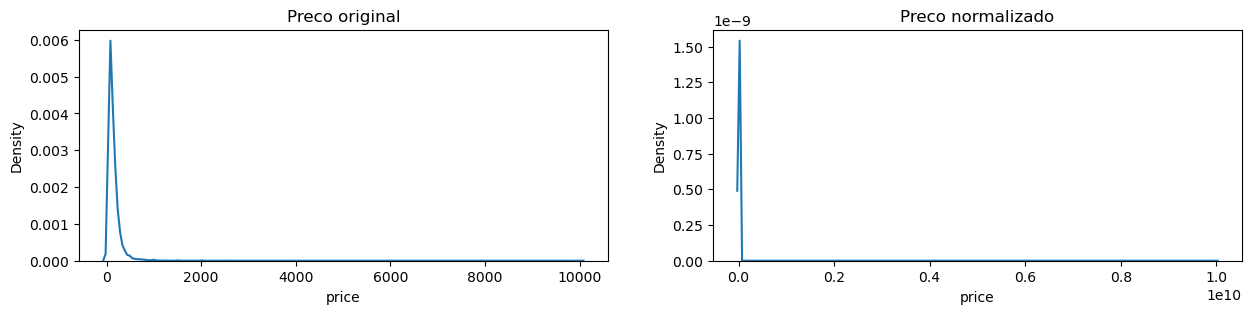

In [19]:
#
normalized_prices = stats.boxcox(X_std)
#plotar ambos pra comparar
fig, ax = plt.subplots(1, 2, figsize =(15, 3))
sns.kdeplot(df_houses['price'], ax = ax[0], legend = False)

ax[0].set_title("Preco original")
sns.kdeplot(X_std, ax = ax[1], legend = False)
ax[1].set_title("Preco normalizado")
plt.show()

#### percebi que a distribuicao ainda não está ideal

tentando uma outra abordagem: scaling the data

In [20]:
scaled_data = minmax_scaling(np.array(df_houses['price']),columns = 0)

In [21]:
scaled_data.min()

0.0

In [22]:
scaled_data.max()

1.0

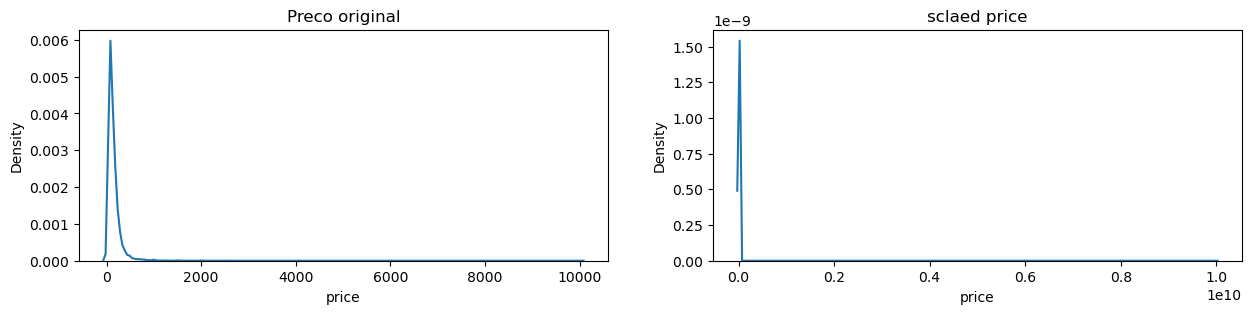

In [23]:
fig, ax = plt.subplots(1, 2, figsize =(15, 3))
sns.kdeplot(df_houses['price'], ax = ax[0], legend = False)
ax[0].set_title("Preco original")
sns.kdeplot(X_std, ax = ax[1], legend = False)
ax[1].set_title("sclaed price")
plt.show()

Exatamente igual ao anterior...

In [24]:
df_houses.columns

Index(['id', 'nome', 'host_id', 'host_name', 'bairro_group', 'bairro',
       'latitude', 'longitude', 'room_type', 'price', 'minimo_noites',
       'numero_de_reviews', 'ultima_review', 'reviews_por_mes',
       'calculado_host_listings_count', 'disponibilidade_365'],
      dtype='object')

In [25]:
df_houses['bairro'].value_counts()

bairro
Williamsburg          3919
Bedford-Stuyvesant    3710
Harlem                2658
Bushwick              2462
Upper West Side       1971
                      ... 
Richmondtown             1
New Dorp                 1
Rossville                1
Woodrow                  1
Willowbrook              1
Name: count, Length: 221, dtype: int64

In [26]:
df_houses['bairro_group'].value_counts()

bairro_group
Manhattan        21660
Brooklyn         20094
Queens            5666
Bronx             1090
Staten Island      373
Name: count, dtype: int64

In [27]:
df_houses['minimo_noites'].value_counts()

minimo_noites
1      12716
2      11693
3       7998
30      3758
4       3302
       ...  
186        1
366        1
68         1
87         1
36         1
Name: count, Length: 109, dtype: int64

In [28]:
df_houses['calculado_host_listings_count']

0        2
1        1
2        1
3        1
4        1
        ..
48889    2
48890    2
48891    1
48892    6
48893    1
Name: calculado_host_listings_count, Length: 48883, dtype: int64

In [29]:
df_houses['id']

0            2595
1            3647
2            3831
3            5022
4            5099
           ...   
48889    36484665
48890    36485057
48891    36485431
48892    36485609
48893    36487245
Name: id, Length: 48883, dtype: int64

In [30]:
df_houses[(df_houses['disponibilidade_365'] == 0)]

id                                               nome    host_id  \
3          5022   Entire Apt: Spacious Studio/Loft by central park       7192   
5          5121                                    BlissArtsSpace!       7356   
7          5203                 Cozy Clean Guest Room - Family Apt       7490   
13         6090                      West Village Nest - Superhost      11975   
19         7801                   Sweet and Spacious Brooklyn Loft      21207   
...         ...                                                ...        ...   
48549  36313048    Sunny room with private entrance in shared home   16883913   
48730  36410519    Sunlight charming apt. in the heart of Brooklyn  121384174   
48755  36419441                            Murray Hill Masterpiece  273824202   
48759  36420725  Sunnyside, Queens 15 Mins to Midtown Clean & C...   19990280   
48778  36424776  Queen size bedroom in two bed apt with great l...   13384464   

           host_name bairro_group              bairro  latitude  longitude  \
3              Laura    Manhattan         East Harlem  40.79851  -73.94399   
5              Garon     Brooklyn  Bedford-Stuyvesant  40.68688  -73.95596   
7          MaryEllen    Manhattan     Upper West Side  40.80178  -73.96723   
13             Alina    Manhattan        West Village  40.73530  -74.00525   
19             Chaya     Brooklyn        Williamsburg  40.71842  -73.95718   
...              ...          ...                 ...       ...        ...   
48549        Tiffany       Queens           Ridgewood  40.69919  -73.89902   
48730  Luciana Paula     Brooklyn          Park Slope  40.66716  -73.98101   
48755          David    Manhattan         Murray Hill  40.74404  -73.97239   
48759        Brandon       Queens           Sunnyside  40.74719  -73.91919   
48778         Hollie     Brooklyn  Bedford-Stuyvesant  40.69617  -73.94198   

             room_type  price  minimo_noites  numero_de_reviews ultima_review  \
3      Entire home/apt     80             10                  9    2018-11-19   
5         Private room     60             45                 49    2017-10-05   
7         Private room     79              2                118    2017-07-21   
13     Entire home/apt    120             90                 27    2018-10-31   
19     Entire home/apt    299              3                  9    2011-12-28   
...                ...    ...            ...                ...           ...   
48549     Private room     45              1                  0           NaN   
48730  Entire home/apt    111              8                  0           NaN   
48755  Entire home/apt    129              2                  0           NaN   
48759     Private room     46              1                  0           NaN   
48778     Private room     50              3                  0           NaN   

       reviews_por_mes  calculado_host_listings_count  disponibilidade_365  
3                 0.10                              1                    0  
5                 0.40                              1                    0  
7                 0.99                              1                    0  
13                0.22                              1                    0  
19                0.07                              1                    0  
...                ...                            ...                  ...  
48549              NaN                              1                    0  
48730              NaN                              1                    0  
48755              NaN                              1                    0  
48759              NaN                              1                    0  
48778              NaN                              1                    0  

[17530 rows x 16 columns]

#### Para responder a pergunta: 
###### Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?


A hipótese utilizada é a seguinte: O aluguel seria mais indicado no local mais barato

In [31]:
df_houses[['bairro','price']]

bairro  price
0                 Midtown    225
1                  Harlem    150
2            Clinton Hill     89
3             East Harlem     80
4             Murray Hill    200
...                   ...    ...
48889  Bedford-Stuyvesant     70
48890            Bushwick     40
48891              Harlem    115
48892      Hell's Kitchen     55
48893      Hell's Kitchen     90

[48883 rows x 2 columns]

In [32]:
df_rent_cheap  = df_houses[['bairro','price', 'room_type']]
df_rent_cheap.value_counts()

bairro              price  room_type      
Bushwick            50     Private room       194
Bedford-Stuyvesant  50     Private room       172
                    60     Private room       162
Williamsburg        60     Private room       159
                    200    Entire home/apt    130
                                             ... 
Greenpoint          126    Entire home/apt      1
                           Private room         1
                    133    Entire home/apt      1
                    134    Entire home/apt      1
Woodside            500    Entire home/apt      1
Name: count, Length: 13822, dtype: int64

In [33]:
df_rent_cheap['bairro'].value_counts()

bairro
Williamsburg          3919
Bedford-Stuyvesant    3710
Harlem                2658
Bushwick              2462
Upper West Side       1971
                      ... 
Richmondtown             1
New Dorp                 1
Rossville                1
Woodrow                  1
Willowbrook              1
Name: count, Length: 221, dtype: int64

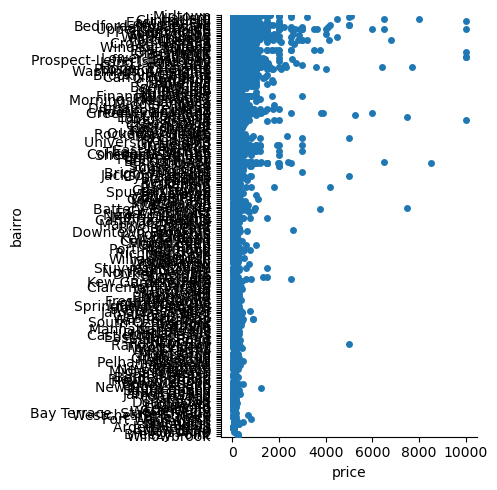

In [34]:
sns.catplot(data = df_rent_cheap, x = 'price', y = 'bairro')

In [35]:
df_rent_final = df_rent_cheap[df_rent_cheap['room_type'] == 'Entire home/apt']
df_rent_final

bairro  price        room_type
0           Midtown    225  Entire home/apt
2      Clinton Hill     89  Entire home/apt
3       East Harlem     80  Entire home/apt
4       Murray Hill    200  Entire home/apt
8         Chinatown    150  Entire home/apt
...             ...    ...              ...
48878  Williamsburg    120  Entire home/apt
48879  Williamsburg    120  Entire home/apt
48885       Midtown    200  Entire home/apt
48886  Williamsburg    170  Entire home/apt
48891        Harlem    115  Entire home/apt

[25407 rows x 3 columns]

In [36]:
bairros = df_rent_final[df_rent_final['room_type'] == 'Entire home/apt']
#print(bairros)
bairros_aptos_casas = bairros['bairro'].unique()
sub_bairro = [bairros_aptos_casas[i:i + 30] for i in range(0, len(bairros_aptos_casas), 30)]

#bairros = df_rent_cheap['bairro'].unique()
print(bairros_aptos_casas)


['Midtown' 'Clinton Hill' 'East Harlem' 'Murray Hill' 'Chinatown'
 'Upper West Side' 'West Village' 'Williamsburg' 'Fort Greene'
 'Crown Heights' 'Bedford-Stuyvesant' "Hell's Kitchen" 'East Village'
 'Bushwick' 'South Slope' 'Harlem' 'Prospect-Lefferts Gardens'
 'Greenpoint' 'Kips Bay' 'SoHo' 'Chelsea' 'Upper East Side'
 'Prospect Heights' 'Park Slope' 'Lower East Side' 'Flatbush'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Cobble Hill'
 'Boerum Hill' 'Financial District' 'Ridgewood' 'Middle Village'
 'Ditmars Steinway' 'Flatiron District' 'Greenwich Village' 'Little Italy'
 'East Flatbush' 'Astoria' 'Eastchester' 'Washington Heights'
 'Kingsbridge' 'Forest Hills' 'Nolita' 'Windsor Terrace' 'Woodlawn'
 'Gravesend' 'Gramercy' 'Allerton' 'East New York' 'Sheepshead Bay'
 'Theater District' 'Long Island City' 'Fort Hamilton' 'Bensonhurst'
 'Shore Acres' 'Sunset Park' 'DUMBO' 'Elmhurst' 'Sunnyside' 'Arrochar'
 'Kensington' 'Spuyten Duyvil' 'Columbia St' 'Brighton Beach'
 'Vinegar Hill

In [37]:
arr_bairros = sub_bairro

result = []
aux_list = []

for i in arr_bairros:
      aux_list.append(i)
      if i[-1] == i[-1][-1]:
            result.append(aux_list)
            aux_list = []

if aux_list:
      result.append(aux_list)

print(result)

[[array(['Midtown', 'Clinton Hill', 'East Harlem', 'Murray Hill',
       'Chinatown', 'Upper West Side', 'West Village', 'Williamsburg',
       'Fort Greene', 'Crown Heights', 'Bedford-Stuyvesant',
       "Hell's Kitchen", 'East Village', 'Bushwick', 'South Slope',
       'Harlem', 'Prospect-Lefferts Gardens', 'Greenpoint', 'Kips Bay',
       'SoHo', 'Chelsea', 'Upper East Side', 'Prospect Heights',
       'Park Slope', 'Lower East Side', 'Flatbush', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Cobble Hill'], dtype=object), array(['Boerum Hill', 'Financial District', 'Ridgewood', 'Middle Village',
       'Ditmars Steinway', 'Flatiron District', 'Greenwich Village',
       'Little Italy', 'East Flatbush', 'Astoria', 'Eastchester',
       'Washington Heights', 'Kingsbridge', 'Forest Hills', 'Nolita',
       'Windsor Terrace', 'Woodlawn', 'Gravesend', 'Gramercy', 'Allerton',
       'East New York', 'Sheepshead Bay', 'Theater District',
       'Long Island City', 'Fort Hamilto

In [38]:
len(arr_bairros)

8

In [39]:
arr_bairros[0]

array(['Midtown', 'Clinton Hill', 'East Harlem', 'Murray Hill',
       'Chinatown', 'Upper West Side', 'West Village', 'Williamsburg',
       'Fort Greene', 'Crown Heights', 'Bedford-Stuyvesant',
       "Hell's Kitchen", 'East Village', 'Bushwick', 'South Slope',
       'Harlem', 'Prospect-Lefferts Gardens', 'Greenpoint', 'Kips Bay',
       'SoHo', 'Chelsea', 'Upper East Side', 'Prospect Heights',
       'Park Slope', 'Lower East Side', 'Flatbush', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Cobble Hill'], dtype=object)

para fazer o plot dividindo os bairros em grupos de cerca de 30, é necessario filtrar os nomes que estao no vetor e fazer o filtro pelos nomes no df para plotar a coluna price

In [40]:
arr_bairros

[array(['Midtown', 'Clinton Hill', 'East Harlem', 'Murray Hill',
        'Chinatown', 'Upper West Side', 'West Village', 'Williamsburg',
        'Fort Greene', 'Crown Heights', 'Bedford-Stuyvesant',
        "Hell's Kitchen", 'East Village', 'Bushwick', 'South Slope',
        'Harlem', 'Prospect-Lefferts Gardens', 'Greenpoint', 'Kips Bay',
        'SoHo', 'Chelsea', 'Upper East Side', 'Prospect Heights',
        'Park Slope', 'Lower East Side', 'Flatbush', 'Brooklyn Heights',
        'Carroll Gardens', 'Gowanus', 'Cobble Hill'], dtype=object),
 array(['Boerum Hill', 'Financial District', 'Ridgewood', 'Middle Village',
        'Ditmars Steinway', 'Flatiron District', 'Greenwich Village',
        'Little Italy', 'East Flatbush', 'Astoria', 'Eastchester',
        'Washington Heights', 'Kingsbridge', 'Forest Hills', 'Nolita',
        'Windsor Terrace', 'Woodlawn', 'Gravesend', 'Gramercy', 'Allerton',
        'East New York', 'Sheepshead Bay', 'Theater District',
        'Long Island City', 

<Figure size 1000x600 with 0 Axes>

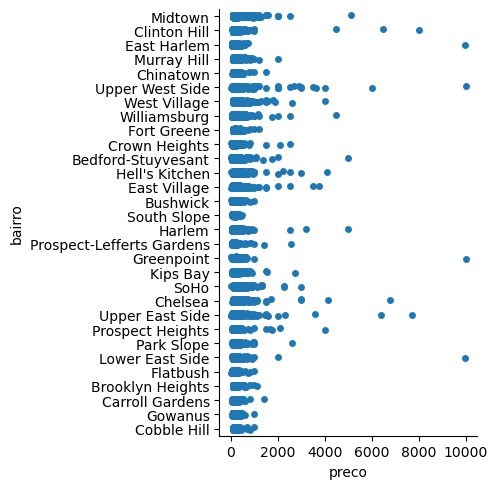

<Figure size 1000x600 with 0 Axes>

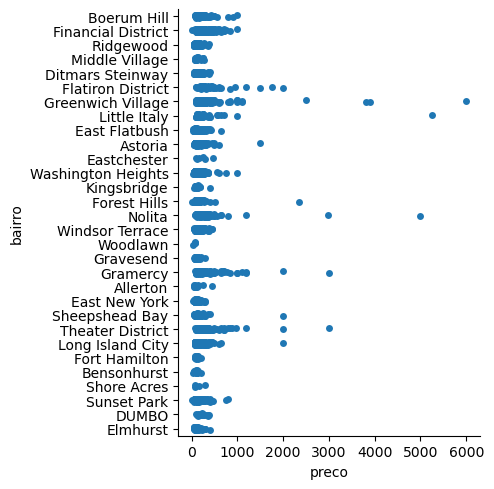

<Figure size 1000x600 with 0 Axes>

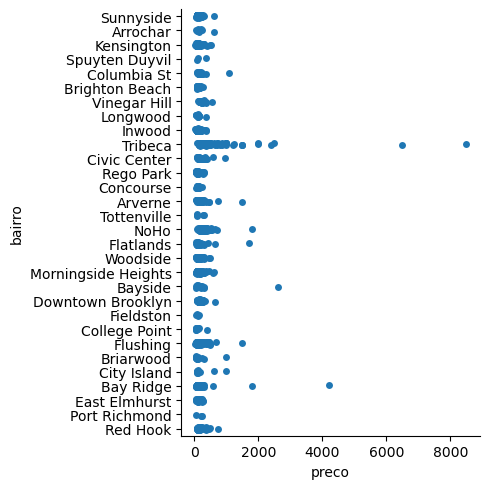

<Figure size 1000x600 with 0 Axes>

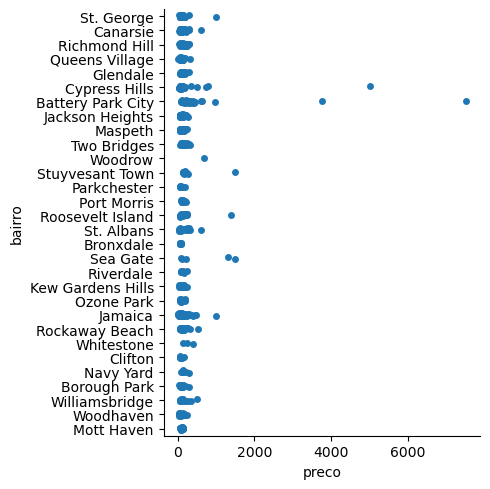

<Figure size 1000x600 with 0 Axes>

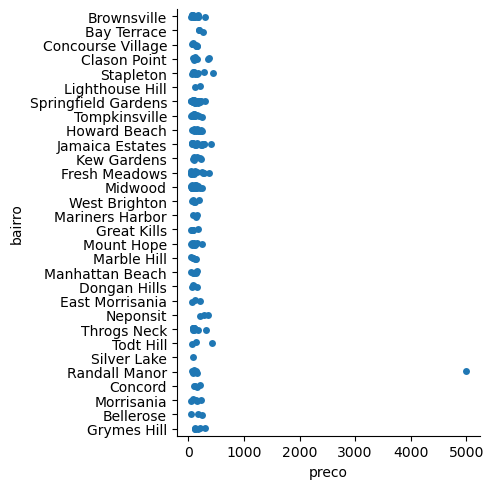

<Figure size 1000x600 with 0 Axes>

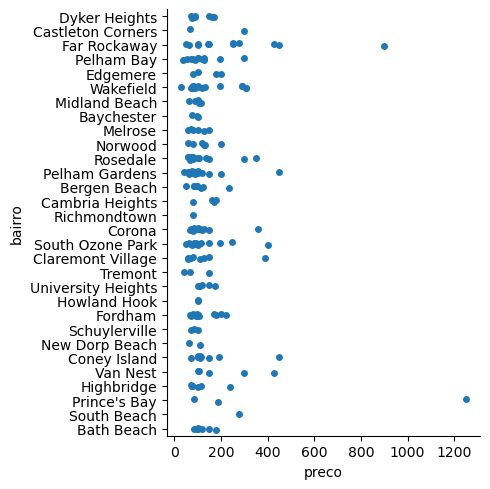

<Figure size 1000x600 with 0 Axes>

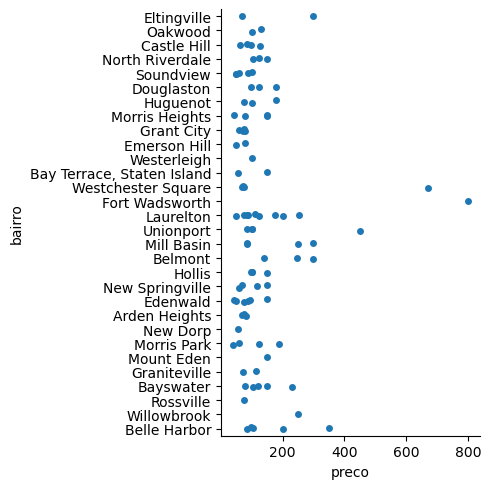

<Figure size 1000x600 with 0 Axes>

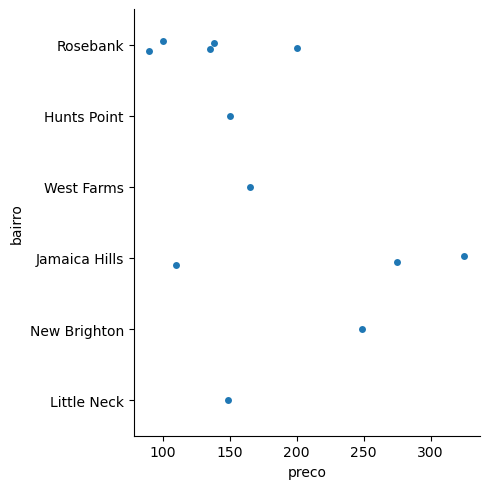

In [41]:
#sns.catplot(data = df_rent_cheap, x = 'price', y = 'bairro')
for i in arr_bairros:
     filter_df = df_rent_final[df_rent_final['bairro'].isin(i)]
     plt.figure(figsize=(10, 6))
     sns.catplot(data = filter_df, x = 'price', y = 'bairro')
     plt.xlabel("preco")
     plt.show()
      

In [42]:
df_rent_final.loc[df_rent_final['bairro'] == 'Soundview']

bairro  price        room_type
21134  Soundview     60  Entire home/apt
28167  Soundview     50  Entire home/apt
28367  Soundview     50  Entire home/apt
36012  Soundview     87  Entire home/apt
42694  Soundview    103  Entire home/apt

In [43]:
df_rent_final.loc[df_rent_final['bairro'] == 'Rosebank']

bairro  price        room_type
36007  Rosebank    200  Entire home/apt
36986  Rosebank     90  Entire home/apt
38425  Rosebank    138  Entire home/apt
41096  Rosebank    100  Entire home/apt
44869  Rosebank    135  Entire home/apt

In [44]:
df_rent_final.loc[9]

bairro       Upper West Side
price                    135
room_type    Entire home/apt
Name: 9, dtype: object

In [45]:
df_rent_final.loc[df_rent_final['bairro'] == 'Jamaica Hills']

bairro  price        room_type
41047  Jamaica Hills    275  Entire home/apt
43133  Jamaica Hills    110  Entire home/apt
46060  Jamaica Hills    325  Entire home/apt

In [46]:
df_rent_final.loc[df_rent_final['bairro'] == 'Little Neck']

bairro  price        room_type
46965  Little Neck    149  Entire home/apt

In [47]:
sort_df_rent = df_rent_final.sort_values(by = 'price')
print(sort_df_rent)

                   bairro  price        room_type
35600  Bedford-Stuyvesant     10  Entire home/apt
32809         Sunset Park     10  Entire home/apt
27971          Greenpoint     10  Entire home/apt
33224             Jamaica     10  Entire home/apt
22834             Jamaica     10  Entire home/apt
...                   ...    ...              ...
30267             Tribeca   8500  Entire home/apt
6529          East Harlem   9999  Entire home/apt
40432     Lower East Side   9999  Entire home/apt
17691          Greenpoint  10000  Entire home/apt
29237     Upper West Side  10000  Entire home/apt

[25407 rows x 3 columns]


os locais mais baratos para alugar sendo o local completo como casa ou apto são os mostrados abaixo

In [48]:
sort_df_rent[sort_df_rent['price'] == 10]

bairro  price        room_type
35600  Bedford-Stuyvesant     10  Entire home/apt
32809         Sunset Park     10  Entire home/apt
27971          Greenpoint     10  Entire home/apt
33224             Jamaica     10  Entire home/apt
22834             Jamaica     10  Entire home/apt
23255     Upper East Side     10  Entire home/apt
2859         East Village     10  Entire home/apt

Pergunta 2) O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?


### Verificando a correlação entre as variáveis

In [49]:
df_disp = df_houses[['bairro','price', 'minimo_noites', 'disponibilidade_365']].sort_values(by = 'price')
df_disp

bairro  price  minimo_noites  disponibilidade_365
22834          Jamaica     10              1                  252
2859      East Village     10             30                  137
27971       Greenpoint     10              1                   32
21699           Harlem     10              1                    0
34445       Highbridge     10              1                  180
...                ...    ...            ...                  ...
40432  Lower East Side   9999             30                  365
6529       East Harlem   9999              5                    0
29237  Upper West Side  10000             30                   83
9150           Astoria  10000            100                    0
17691       Greenpoint  10000              5                    0

[48883 rows x 4 columns]

In [50]:
df_disp['price'].isnull().sum()

0

In [51]:
df_disp['minimo_noites'].isnull().sum()

0

In [52]:
df_disp['disponibilidade_365'].isnull().sum()

0

In [53]:
corr_pearson = df_disp[['price', 'disponibilidade_365', 'minimo_noites']].corr(method = 'pearson')

In [54]:
corr_kendal = df_disp[['price', 'disponibilidade_365', 'minimo_noites']].corr(method = 'kendall')

In [55]:
corr_spearman = df_disp[['price', 'disponibilidade_365', 'minimo_noites']].corr(method = 'spearman')

plot do heatmap

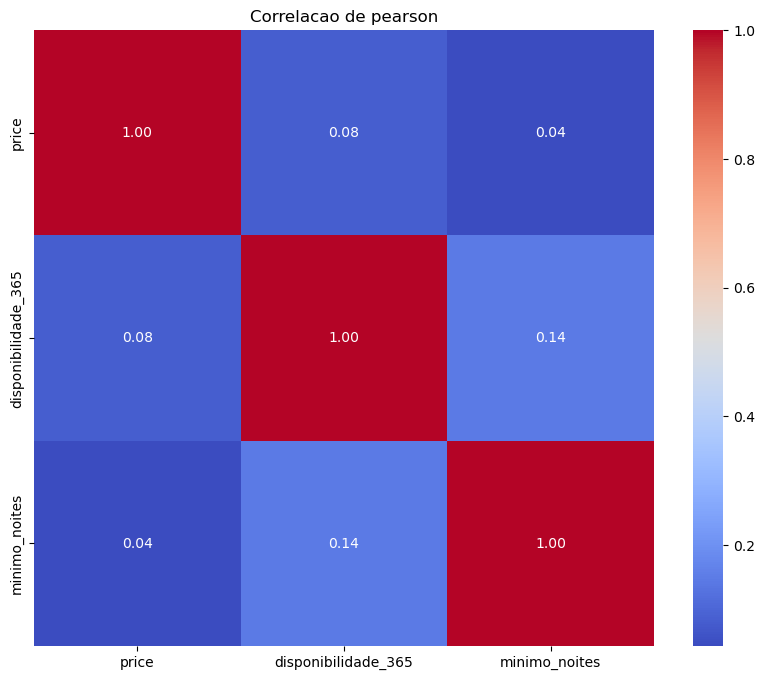

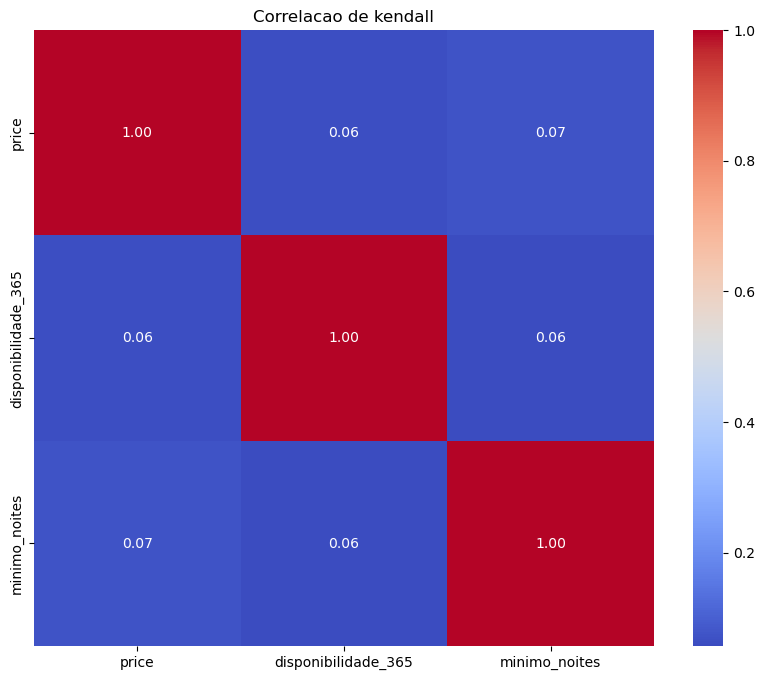

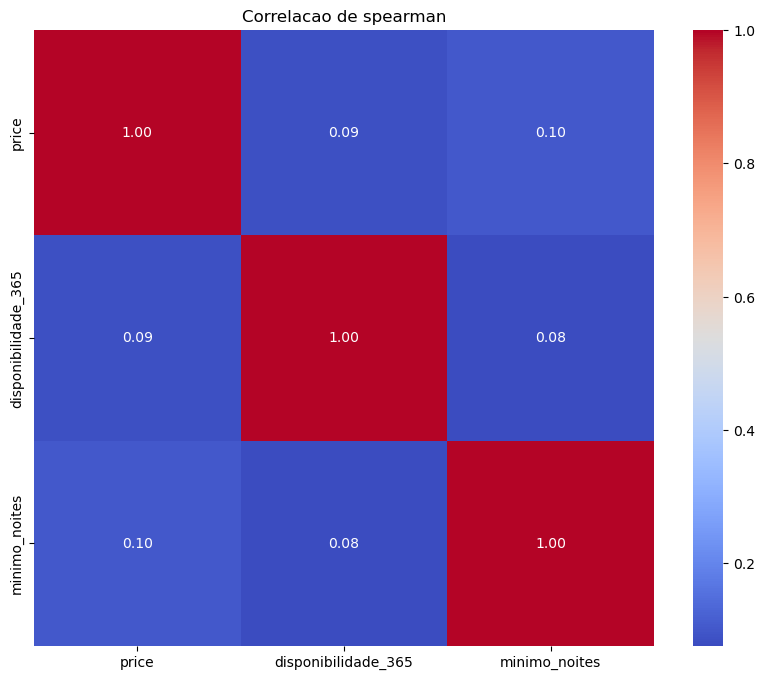

In [56]:
corr_list = [corr_pearson, corr_kendal, corr_spearman]
titles = ["Correlacao de pearson","Correlacao de kendall","Correlacao de spearman"]
for i,co in enumerate(corr_list):
      plt.figure(figsize=(10,8))
      sns.heatmap(co, annot = True, cmap = 'coolwarm', fmt = ".2f")
      plt.title(titles[i])
      plt.show()

Ao utilizar as correlação de Pearson, Kendall e de Spearman através dos heatmaps acima, podemos ver que entre o numero mínimo de noites, a disponibilidade durante o ano e o preço estão correlacionados.

3) Existe algum padrão no texto do nome do local para lugares de mais alto valor?


Analisarei a media por bairro e com os valores que estarão acima da média, analisar a coluna nome

In [57]:
df_houses.columns

Index(['id', 'nome', 'host_id', 'host_name', 'bairro_group', 'bairro',
       'latitude', 'longitude', 'room_type', 'price', 'minimo_noites',
       'numero_de_reviews', 'ultima_review', 'reviews_por_mes',
       'calculado_host_listings_count', 'disponibilidade_365'],
      dtype='object')

In [58]:
df_houses['id'].duplicated().any()

False

In [59]:
df_rich_name = df_houses[['id','nome', 'bairro', 'bairro_group','price']]
df_rich_name

id                                               nome  \
0          2595                              Skylit Midtown Castle   
1          3647                THE VILLAGE OF HARLEM....NEW YORK !   
2          3831                    Cozy Entire Floor of Brownstone   
3          5022   Entire Apt: Spacious Studio/Loft by central park   
4          5099          Large Cozy 1 BR Apartment In Midtown East   
...         ...                                                ...   
48889  36484665    Charming one bedroom - newly renovated rowhouse   
48890  36485057      Affordable room in Bushwick/East Williamsburg   
48891  36485431            Sunny Studio at Historical Neighborhood   
48892  36485609               43rd St. Time Square-cozy single bed   
48893  36487245  Trendy duplex in the very heart of Hell's Kitchen   

                   bairro bairro_group  price  
0                 Midtown    Manhattan    225  
1                  Harlem    Manhattan    150  
2            Clinton Hill     Brooklyn     89  
3             East Harlem    Manhattan     80  
4             Murray Hill    Manhattan    200  
...                   ...          ...    ...  
48889  Bedford-Stuyvesant     Brooklyn     70  
48890            Bushwick     Brooklyn     40  
48891              Harlem    Manhattan    115  
48892      Hell's Kitchen    Manhattan     55  
48893      Hell's Kitchen    Manhattan     90  

[48883 rows x 5 columns]

In [60]:
df_rich_name.columns

Index(['id', 'nome', 'bairro', 'bairro_group', 'price'], dtype='object')

In [61]:
df_rich_name['id']

0            2595
1            3647
2            3831
3            5022
4            5099
           ...   
48889    36484665
48890    36485057
48891    36485431
48892    36485609
48893    36487245
Name: id, Length: 48883, dtype: int64

In [62]:
mean_bairro = df_rich_name.groupby('bairro')['price'].mean().round(2).reset_index()
mean_bairro.columns = ['bairro', 'mean_bairro']

In [63]:
mean_bairro

bairro  mean_bairro
0           Allerton        87.60
1      Arden Heights        67.25
2           Arrochar       115.00
3            Arverne       171.78
4            Astoria       117.19
..               ...          ...
216  Windsor Terrace       138.99
217        Woodhaven        67.17
218         Woodlawn        60.09
219          Woodrow       700.00
220         Woodside        85.10

[221 rows x 2 columns]

In [64]:
mean_bairro_with_id = df_rich_name.groupby('bairro')['price'].mean().round(2).reset_index()

mean_bairro_with_id = mean_bairro_with_id.merge(df_rich_name[['id', 'bairro']], on = 'bairro', how = 'left')
mean_bairro_with_id = mean_bairro_with_id.rename(columns = {'price': 'mean_bairro'})
mean_bairro_with_id
#mean_bairro_new = mean_bairro_new[['id','bairro', 'mean_bairro_new']]

bairro  mean_bairro        id
0      Allerton         87.6    182177
1      Allerton         87.6    498120
2      Allerton         87.6    715270
3      Allerton         87.6    755528
4      Allerton         87.6    773041
...         ...          ...       ...
48878  Woodside         85.1  35634704
48879  Woodside         85.1  35716084
48880  Woodside         85.1  35876561
48881  Woodside         85.1  36062221
48882  Woodside         85.1  36265137

[48883 rows x 3 columns]

In [65]:
df_mean_bairro = pd.merge(df_rich_name,mean_bairro,on = 'bairro', how = 'left')


In [66]:

df_mean_bairro.insert(df_mean_bairro.columns.get_loc('bairro') + 1, 'mean_bairro', df_mean_bairro.pop('mean_bairro'))

In [67]:
df_mean_bairro[df_mean_bairro['bairro'] ==  'Allerton']

id                                               nome    bairro  \
509      182177              A PRIVATE FLAT / APARTMENT- $SPECIAL$  Allerton   
1166     498120                              Hi Traveler.. welcome  Allerton   
1577     715270  2 Beds/Queen & Full Beautiful Room 40 minsT.Sq...  Allerton   
1665     755528                 PRIVATE BATH/TONS OF SUNLIGHT/SAFE  Allerton   
1705     773041                   Nice beautiful room In the Bronx  Allerton   
4794    3400359                                   Awesome Deal NYC  Allerton   
4825    3429765                                 Sunny Private Room  Allerton   
6022    4407790                                       Retreat Room  Allerton   
6096    4462008                                         Twin  room  Allerton   
7017    5046189  Modern/Spacious 4BR +Tent Perfect for LARGE gr...  Allerton   
10780   8294259  Room in Private House(Queen Bed) by Montefiore...  Allerton   
12315   9513511  Spacious & Sunny Room Perfect for Medical Stud...  Allerton   
15544  12496118    Entire Home in NYC- 1 bedroom/ Private Entrance  Allerton   
17628  13864221                     Live, Love, Stay in the Bronx!  Allerton   
22193  17876530         Spacious Garden Apartment Private Entrance  Allerton   
22774  18442048                            Clean-N-Comfy Bronx Pad  Allerton   
23276  18852048      Clean, spacious and comfortable room at Bronx  Allerton   
23279  18852919            THE PERFECT QUIET ATMOSPHERE  WHEN HOME  Allerton   
26216  20904409                           Luxury Tiny house • Ohka  Allerton   
27867  21830694                        A Piece of mind in the city  Allerton   
30043  23139647    Spacious 2 level home for Groups sleeps upto 12  Allerton   
31801  24821651                                        Hiéroglyphe  Allerton   
33238  26255080  ♥♥♥ Entire House with Backyard & Superfast WiF...  Allerton   
33538  26552340  *NYC Flat Cold Cozy Private Room w/ Blazin' WiFi*  Allerton   
33541  26554732  Beautiful NYC Private Room/Bath, Late Check-In OK  Allerton   
33555  26559892  == Modern, A/C, Easy Check-in / Book Instantly ==  Allerton   
33557  26560264  ❤️ Beautiful, Bright Room - Late Self Check-In...  Allerton   
33728  26744053                                       Private Room  Allerton   
34458  27343189                             Jay's Studio Apartment  Allerton   
37373  29674940  Sunlit Backyard in NYC + Walk to Zoo and Gardens!  Allerton   
37552  29800915     Entire floor (private entrance) w/ 1 BR in NYC  Allerton   
38148  30109916   Entire Spacious Apt. with Comfy Queen Bed & WiFi  Allerton   
38366  30225205                                      Relax De Dios  Allerton   
38581  30348636         Quiet, serene Holiday getaway in the Bronx  Allerton   
39844  30965544  Spacious sun-filled bedroom near Botanical Garden  Allerton   
42946  33363084  E community that is commercially (Website hidd...  Allerton   
43290  33571691                   RV camper for the outdoor lovers  Allerton   
45746  34941479                         Place to be Private room 2  Allerton   
45747  34941499                                     Private room 1  Allerton   
45748  34941506                   Place to be( 3bedroom apartment)  Allerton   
46409  35237543                     The Place to be private room 3  Allerton   
47925  35996222      Stylish 2 Beds Apartment with Private Parking  Allerton   

       mean_bairro bairro_group  price  
509           87.6        Bronx    125  
1166          87.6        Bronx     35  
1577          87.6        Bronx     39  
1665          87.6        Bronx     49  
1705          87.6        Bronx     38  
4794          87.6        Bronx     49  
4825          87.6        Bronx     47  
6022          87.6        Bronx     49  
6096          87.6        Bronx     47  
7017          87.6        Bronx    450  
10780         87.6        Bronx     63  
12315         87.6        Bronx     85  
15544         87.6        Bronx    104 

In [68]:
df_mean_bairro.head(15)

id                                              nome  \
0   2595                             Skylit Midtown Castle   
1   3647               THE VILLAGE OF HARLEM....NEW YORK !   
2   3831                   Cozy Entire Floor of Brownstone   
3   5022  Entire Apt: Spacious Studio/Loft by central park   
4   5099         Large Cozy 1 BR Apartment In Midtown East   
5   5121                                   BlissArtsSpace!   
6   5178                  Large Furnished Room Near B'way    
7   5203                Cozy Clean Guest Room - Family Apt   
8   5238                Cute & Cozy Lower East Side 1 bdrm   
9   5295                  Beautiful 1br on Upper West Side   
10  5441                   Central Manhattan/near Broadway   
11  5803    Lovely Room 1, Garden, Best Area, Legal rental   
12  6021  Wonderful Guest Bedroom in Manhattan for SINGLES   
13  6090                     West Village Nest - Superhost   
14  6848                  Only 2 stops to Manhattan studio   

                bairro  mean_bairro bairro_group  price  
0              Midtown       282.72    Manhattan    225  
1               Harlem       118.97    Manhattan    150  
2         Clinton Hill       181.89     Brooklyn     89  
3          East Harlem       133.20    Manhattan     80  
4          Murray Hill       221.42    Manhattan    200  
5   Bedford-Stuyvesant       107.79     Brooklyn     60  
6       Hell's Kitchen       204.79    Manhattan     79  
7      Upper West Side       210.92    Manhattan     79  
8            Chinatown       161.50    Manhattan    150  
9      Upper West Side       210.92    Manhattan    135  
10      Hell's Kitchen       204.79    Manhattan     85  
11         South Slope       146.73     Brooklyn     89  
12     Upper West Side       210.92    Manhattan     85  
13        West Village       267.68    Manhattan    120  
14        Williamsburg       143.84     Brooklyn    140

In [69]:
df_price_abov_avg = df_mean_bairro[df_mean_bairro['price'] > df_mean_bairro['mean_bairro']]
df_price_abov_avg

id                                             nome  \
1          3647              THE VILLAGE OF HARLEM....NEW YORK !   
15         7097                Perfect for Your Parents + Garden   
18         7750                Huge 2 BR Upper East  Cental Park   
19         7801                 Sweet and Spacious Brooklyn Loft   
23         8490           MAISON DES SIRENES1,bohemian apartment   
...         ...                                              ...   
48860  36476675                                    Nycity-MyHome   
48861  36477307                                Brooklyn paradise   
48863  36478343                            Welcome all as family   
48872  36482783      Brooklyn Oasis in the heart of Williamsburg   
48875  36483152  Garden Jewel Apartment in Williamsburg New York   

                   bairro  mean_bairro bairro_group  price  
1                  Harlem       118.97    Manhattan    150  
15            Fort Greene       151.37     Brooklyn    215  
18            East Harlem       133.20    Manhattan    190  
19           Williamsburg       143.84     Brooklyn    299  
23     Bedford-Stuyvesant       107.79     Brooklyn    120  
...                   ...          ...          ...    ...  
48860      Hell's Kitchen       204.79    Manhattan    260  
48861           Flatlands       126.43     Brooklyn    170  
48863         East Harlem       133.20    Manhattan    140  
48872        Williamsburg       143.84     Brooklyn    190  
48875        Williamsburg       143.84     Brooklyn    170  

[15643 rows x 6 columns]

In [70]:
dados_nlp = df_price_abov_avg
dados_nlp = pd.DataFrame(dados_nlp)

In [71]:
dados_nlp

id                                             nome  \
1          3647              THE VILLAGE OF HARLEM....NEW YORK !   
15         7097                Perfect for Your Parents + Garden   
18         7750                Huge 2 BR Upper East  Cental Park   
19         7801                 Sweet and Spacious Brooklyn Loft   
23         8490           MAISON DES SIRENES1,bohemian apartment   
...         ...                                              ...   
48860  36476675                                    Nycity-MyHome   
48861  36477307                                Brooklyn paradise   
48863  36478343                            Welcome all as family   
48872  36482783      Brooklyn Oasis in the heart of Williamsburg   
48875  36483152  Garden Jewel Apartment in Williamsburg New York   

                   bairro  mean_bairro bairro_group  price  
1                  Harlem       118.97    Manhattan    150  
15            Fort Greene       151.37     Brooklyn    215  
18            East Harlem       133.20    Manhattan    190  
19           Williamsburg       143.84     Brooklyn    299  
23     Bedford-Stuyvesant       107.79     Brooklyn    120  
...                   ...          ...          ...    ...  
48860      Hell's Kitchen       204.79    Manhattan    260  
48861           Flatlands       126.43     Brooklyn    170  
48863         East Harlem       133.20    Manhattan    140  
48872        Williamsburg       143.84     Brooklyn    190  
48875        Williamsburg       143.84     Brooklyn    170  

[15643 rows x 6 columns]

In [72]:
dados_nlp['nome'].isnull().sum()
#6 valores NaN e com isso vou dropar esses 6 valores
dados_nlp.dropna(subset = ['nome'],inplace = True)

In [73]:
dados_nlp['nome'].isnull().sum()


0

In [74]:
#tokeninze the description
tokens = dados_nlp['nome'].apply(word_tokenize)

#prepocess tokens

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
tokens_filtered = tokens.apply(lambda x: [lemmatizer.lemmatize(word.lower()) for word in x if word.isalnum() and word.lower() not in stop_words])


In [75]:
#flatten the list of token
all_tokens = [word for sublist in tokens_filtered for word in sublist]

#conto a ocorrencia de cada palavra
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(all_tokens)

#converte o vetor que conta as ocorrencias no DF
word_counts = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())

#calcula a frequencia das palavras
word_frequencies = word_counts.sum().sort_values(ascending = False)

#get the most commom words

top_words = word_frequencies.head(10).index.tolist()

# vou calcular a correlacao usando o parametro de Pearson
avg_prices = {}

for word in top_words:
      word_occurences = tokens_filtered.apply(lambda x: x.count(word))
      #correlation, _ = pearsonr(word_counts[word],dados_nlp['price'])
      #correlations[word] = correlation
      avg_price = dados_nlp.loc[word_occurences > 0, 'price'].mean()
      avg_prices[word] = avg_price
print(avg_prices)
print(word)
print(top_words)
print("Correlacao entre preco e as palavras que mais se repetem:")
for word, avg_price in avg_prices.items():
      print(word, avg_price.round(2))
df_words_expensive = pd.DataFrame(avg_prices.items(),columns = ['Word', 'Average Price'])

{'apartment': 230.06131718395156, 'bedroom': 264.6, 'apt': 246.18770053475936, 'brooklyn': 222.168458781362, 'spacious': 217.3824670287044, 'private': 241.41442953020135, 'manhattan': 275.3671111111111, 'park': 292.177908113392, 'williamsburg': 241.65968063872256, 'loft': 332.59164969450103}
loft
['apartment', 'bedroom', 'apt', 'brooklyn', 'spacious', 'private', 'manhattan', 'park', 'williamsburg', 'loft']
Correlacao entre preco e as palavras que mais se repetem:
apartment 230.06
bedroom 264.6
apt 246.19
brooklyn 222.17
spacious 217.38
private 241.41
manhattan 275.37
park 292.18
williamsburg 241.66
loft 332.59


#### O dataframe abaixo é um estudo usando técnicas de NLP, que mostra as 10 palavras que aparecem nos precos mais caros

In [76]:
df_words_expensive

Word  Average Price
0     apartment     230.061317
1       bedroom     264.600000
2           apt     246.187701
3      brooklyn     222.168459
4      spacious     217.382467
5       private     241.414430
6     manhattan     275.367111
7          park     292.177908
8  williamsburg     241.659681
9          loft     332.591650

### Já o recorte do dataframe abaixo é ordenado pelo preço e mostra os mais caros primeiros

In [77]:
df_price_abov_avg.insert(df_price_abov_avg.columns.get_loc('bairro') + 1, 'mean_bairro', df_price_abov_avg.pop('mean_bairro'))

In [78]:
df_price_abov_avg.sort_values(by = 'price',ascending= False)

id                                               nome  \
17691  13894339    Luxury 1 bedroom apt. -stunning Manhattan views   
9150    7003697                Furnished room in Astoria apartment   
29226  22436899                                1-BR Lincoln Center   
6529    4737930                                 Spanish Harlem Apt   
40421  31340283  2br - The Heart of NYC: Manhattans Lower East ...   
...         ...                                                ...   
48056  36068351                                   The Emperors Den   
18933  15041647               Private Bedroom in NYC w/ SUPERHOST.   
19268  15345313         Bronx Beauty: Renovated historic rowhouse.   
48243  36154590                          Private and Cozy Bedroom.   
48242  36154148                Private and cozy bedroom, for rent.   

                bairro  mean_bairro   bairro_group  price  
17691       Greenpoint       144.95       Brooklyn  10000  
9150           Astoria       117.19         Queens  10000  
29226  Upper West Side       210.92      Manhattan  10000  
6529       East Harlem       133.20      Manhattan   9999  
40421  Lower East Side       186.31      Manhattan   9999  
...                ...          ...            ...    ...  
48056        Bronxdale        57.11          Bronx     60  
18933           Corona        59.17         Queens     60  
19268      Hunts Point        50.50          Bronx     59  
48243      Bull's Head        47.33  Staten Island     50  
48242      Bull's Head        47.33  Staten Island     50  

[15643 rows x 6 columns]

### Com esse exemplo conseguimos ver que várias palavras aparecem na descrição do anúncio e em colunas como bairro e bairro_group

In [79]:
df_mean_bairro[df_mean_bairro['bairro'] ==  'Greenpoint']

id                                               nome  \
31         9782                  Loft in Williamsburg Area w/ Roof   
52        14314                    Greenpoint Place...Has It All!    
57        15338                    Room in Greenpoint Loft w/ Roof   
131       30031                   NYC artists’ loft with roof deck   
139       32100                    Modern Greenpoint, Brooklyn Apt   
...         ...                                                ...   
48709  36402818     SMALL STUDIO IN EXCELLENT GREENPOINT LOCATION!   
48753  36421796                    Cozy Room with Private Bathroom   
48759  36423944                    Modern room in luxury apartment   
48842  36456548  Gorgeous Brooklyn Penthouse Apartment w/City V...   
48869  36481615                   Peaceful space in Greenpoint, BK   

           bairro  mean_bairro bairro_group  price  
31     Greenpoint       144.95     Brooklyn     55  
52     Greenpoint       144.95     Brooklyn    144  
57     Greenpoint       144.95     Brooklyn     49  
131    Greenpoint       144.95     Brooklyn     50  
139    Greenpoint       144.95     Brooklyn    250  
...           ...          ...          ...    ...  
48709  Greenpoint       144.95     Brooklyn     85  
48753  Greenpoint       144.95     Brooklyn    105  
48759  Greenpoint       144.95     Brooklyn    130  
48842  Greenpoint       144.95     Brooklyn    150  
48869  Greenpoint       144.95     Brooklyn     54  

[1114 rows x 6 columns]

In [80]:
df_most_expensive = df_price_abov_avg.sort_values(by = 'price', ascending=False)
df_most_expensive.head(15)

id                                               nome  \
17691  13894339    Luxury 1 bedroom apt. -stunning Manhattan views   
9150    7003697                Furnished room in Astoria apartment   
29226  22436899                                1-BR Lincoln Center   
6529    4737930                                 Spanish Harlem Apt   
40421  31340283  2br - The Heart of NYC: Manhattans Lower East ...   
12341   9528920                Quiet, Clean, Lit @ LES & Chinatown   
30256  23377410  Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho   
4376    2953058                                      Film Location   
29650  22779726          East 72nd Townhouse by (Hidden by Airbnb)   
45654  34895693                               Gem of east Flatbush   
42511  33007610                70' Luxury MotorYacht on the Hudson   
44022  33998396                   3000 sq ft daylight photo studio   
37182  29547314               Apartment New York \nHell’s Kitchens   
48031  36056808       Luxury TriBeCa Apartment at an amazing price   
3773    2271504                   SUPER BOWL Brooklyn Duplex Apt!!   

                  bairro  mean_bairro bairro_group  price  
17691         Greenpoint       144.95     Brooklyn  10000  
9150             Astoria       117.19       Queens  10000  
29226    Upper West Side       210.92    Manhattan  10000  
6529         East Harlem       133.20    Manhattan   9999  
40421    Lower East Side       186.31    Manhattan   9999  
12341    Lower East Side       186.31    Manhattan   9999  
30256            Tribeca       490.64    Manhattan   8500  
4376        Clinton Hill       181.89     Brooklyn   8000  
29650    Upper East Side       188.95    Manhattan   7703  
45654      East Flatbush       104.22     Brooklyn   7500  
42511  Battery Park City       367.56    Manhattan   7500  
44022            Chelsea       249.74    Manhattan   6800  
37182    Upper West Side       210.92    Manhattan   6500  
48031            Tribeca       490.64    Manhattan   6500  
3773        Clinton Hill       181.89     Brooklyn   6500

##### Portanto o padrão que encontrei diz respeito as palavras mais presentes em apartamentos que estao com o preço acima da média em cada bairro(mean_bairro) estão presentes nos apartamentos mais caros(presente no dataframe df_most_expensive) indicando uma correlação presente

Existe uma probabilidade alta de se as palavras presentes em df_words_expensive estiverem no anúncio o local ser de alto padrão com preços acima da média

In [81]:
df_words_expensive

Word  Average Price
0     apartment     230.061317
1       bedroom     264.600000
2           apt     246.187701
3      brooklyn     222.168459
4      spacious     217.382467
5       private     241.414430
6     manhattan     275.367111
7          park     292.177908
8  williamsburg     241.659681
9          loft     332.591650

#### Geographical Analysis Using Latitude, Longitude vs Median_house_values

# Exercício de previsão/classificação

In [84]:
mean_bairro

bairro  mean_bairro
0           Allerton        87.60
1      Arden Heights        67.25
2           Arrochar       115.00
3            Arverne       171.78
4            Astoria       117.19
..               ...          ...
216  Windsor Terrace       138.99
217        Woodhaven        67.17
218         Woodlawn        60.09
219          Woodrow       700.00
220         Woodside        85.10

[221 rows x 2 columns]

In [85]:
df_prevision_price = pd.merge(df_mean_bairro,mean_bairro,on = 'bairro', how = 'left')

In [86]:
df_prevision_price

id                                               nome  \
0          2595                              Skylit Midtown Castle   
1          3647                THE VILLAGE OF HARLEM....NEW YORK !   
2          3831                    Cozy Entire Floor of Brownstone   
3          5022   Entire Apt: Spacious Studio/Loft by central park   
4          5099          Large Cozy 1 BR Apartment In Midtown East   
...         ...                                                ...   
48878  36484665    Charming one bedroom - newly renovated rowhouse   
48879  36485057      Affordable room in Bushwick/East Williamsburg   
48880  36485431            Sunny Studio at Historical Neighborhood   
48881  36485609               43rd St. Time Square-cozy single bed   
48882  36487245  Trendy duplex in the very heart of Hell's Kitchen   

                   bairro  mean_bairro_x bairro_group  price  mean_bairro_y  
0                 Midtown         282.72    Manhattan    225         282.72  
1                  Harlem         118.97    Manhattan    150         118.97  
2            Clinton Hill         181.89     Brooklyn     89         181.89  
3             East Harlem         133.20    Manhattan     80         133.20  
4             Murray Hill         221.42    Manhattan    200         221.42  
...                   ...            ...          ...    ...            ...  
48878  Bedford-Stuyvesant         107.79     Brooklyn     70         107.79  
48879            Bushwick          84.90     Brooklyn     40          84.90  
48880              Harlem         118.97    Manhattan    115         118.97  
48881      Hell's Kitchen         204.79    Manhattan     55         204.79  
48882      Hell's Kitchen         204.79    Manhattan     90         204.79  

[48883 rows x 7 columns]

In [87]:
df_prevision_price.rename(columns = {'mean_bairro_x': 'mean_bairro'}, inplace=True)

In [88]:
df_prevision_price.drop(columns = ['mean_bairro_y'], inplace= True)

In [89]:
df_prevision_price

id                                               nome  \
0          2595                              Skylit Midtown Castle   
1          3647                THE VILLAGE OF HARLEM....NEW YORK !   
2          3831                    Cozy Entire Floor of Brownstone   
3          5022   Entire Apt: Spacious Studio/Loft by central park   
4          5099          Large Cozy 1 BR Apartment In Midtown East   
...         ...                                                ...   
48878  36484665    Charming one bedroom - newly renovated rowhouse   
48879  36485057      Affordable room in Bushwick/East Williamsburg   
48880  36485431            Sunny Studio at Historical Neighborhood   
48881  36485609               43rd St. Time Square-cozy single bed   
48882  36487245  Trendy duplex in the very heart of Hell's Kitchen   

                   bairro  mean_bairro bairro_group  price  
0                 Midtown       282.72    Manhattan    225  
1                  Harlem       118.97    Manhattan    150  
2            Clinton Hill       181.89     Brooklyn     89  
3             East Harlem       133.20    Manhattan     80  
4             Murray Hill       221.42    Manhattan    200  
...                   ...          ...          ...    ...  
48878  Bedford-Stuyvesant       107.79     Brooklyn     70  
48879            Bushwick        84.90     Brooklyn     40  
48880              Harlem       118.97    Manhattan    115  
48881      Hell's Kitchen       204.79    Manhattan     55  
48882      Hell's Kitchen       204.79    Manhattan     90  

[48883 rows x 6 columns]

In [90]:
#df_mean_bairro = pd.merge(df_rich_name,mean_bairro,on = 'bairro', how = 'left')


In [91]:
mean_bairro

bairro  mean_bairro
0           Allerton        87.60
1      Arden Heights        67.25
2           Arrochar       115.00
3            Arverne       171.78
4            Astoria       117.19
..               ...          ...
216  Windsor Terrace       138.99
217        Woodhaven        67.17
218         Woodlawn        60.09
219          Woodrow       700.00
220         Woodside        85.10

[221 rows x 2 columns]

In [92]:
df_prevision_price

id                                               nome  \
0          2595                              Skylit Midtown Castle   
1          3647                THE VILLAGE OF HARLEM....NEW YORK !   
2          3831                    Cozy Entire Floor of Brownstone   
3          5022   Entire Apt: Spacious Studio/Loft by central park   
4          5099          Large Cozy 1 BR Apartment In Midtown East   
...         ...                                                ...   
48878  36484665    Charming one bedroom - newly renovated rowhouse   
48879  36485057      Affordable room in Bushwick/East Williamsburg   
48880  36485431            Sunny Studio at Historical Neighborhood   
48881  36485609               43rd St. Time Square-cozy single bed   
48882  36487245  Trendy duplex in the very heart of Hell's Kitchen   

                   bairro  mean_bairro bairro_group  price  
0                 Midtown       282.72    Manhattan    225  
1                  Harlem       118.97    Manhattan    150  
2            Clinton Hill       181.89     Brooklyn     89  
3             East Harlem       133.20    Manhattan     80  
4             Murray Hill       221.42    Manhattan    200  
...                   ...          ...          ...    ...  
48878  Bedford-Stuyvesant       107.79     Brooklyn     70  
48879            Bushwick        84.90     Brooklyn     40  
48880              Harlem       118.97    Manhattan    115  
48881      Hell's Kitchen       204.79    Manhattan     55  
48882      Hell's Kitchen       204.79    Manhattan     90  

[48883 rows x 6 columns]

In [93]:
len(mean_bairro.value_counts())

221

In [94]:
label_encoded = LabelEncoder()
df_prevision_price['bairro_encoded'] = label_encoded.fit_transform(df_prevision_price['bairro']) 
df_prevision_price

id                                               nome  \
0          2595                              Skylit Midtown Castle   
1          3647                THE VILLAGE OF HARLEM....NEW YORK !   
2          3831                    Cozy Entire Floor of Brownstone   
3          5022   Entire Apt: Spacious Studio/Loft by central park   
4          5099          Large Cozy 1 BR Apartment In Midtown East   
...         ...                                                ...   
48878  36484665    Charming one bedroom - newly renovated rowhouse   
48879  36485057      Affordable room in Bushwick/East Williamsburg   
48880  36485431            Sunny Studio at Historical Neighborhood   
48881  36485609               43rd St. Time Square-cozy single bed   
48882  36487245  Trendy duplex in the very heart of Hell's Kitchen   

                   bairro  mean_bairro bairro_group  price  bairro_encoded  
0                 Midtown       282.72    Manhattan    225             127  
1                  Harlem       118.97    Manhattan    150              94  
2            Clinton Hill       181.89     Brooklyn     89              41  
3             East Harlem       133.20    Manhattan     80              61  
4             Murray Hill       221.42    Manhattan    200             137  
...                   ...          ...          ...    ...             ...  
48878  Bedford-Stuyvesant       107.79     Brooklyn     70              13  
48879            Bushwick        84.90     Brooklyn     40              28  
48880              Harlem       118.97    Manhattan    115              94  
48881      Hell's Kitchen       204.79    Manhattan     55              95  
48882      Hell's Kitchen       204.79    Manhattan     90              95  

[48883 rows x 7 columns]

In [95]:
df_prevision_price[df_prevision_price['nome'].duplicated()]

id                                               nome  \
329       81739                  Loft w/ Terrace @ Box House Hotel   
338       84010                               Superior @ Box House   
579      219818                 ✿✿✿ COUNTRY COTTAGE IN THE CITY✿✿✿   
660      250537                                The Lenox in Harlem   
668      253471                   Loft Suite @ The Box House Hotel   
...         ...                                                ...   
48672  36382847                                       Comfort home   
48723  36412461  Sunny, Cozy, Private Room In The Heart of Bush...   
48747  36420404                                    Home Sweet Home   
48779  36427922                                Home away from home   
48814  36449743                                  Brooklyn's finest   

                bairro  mean_bairro bairro_group  price  bairro_encoded  
329         Greenpoint       144.95     Brooklyn    249              91  
338         Greenpoint       144.95     Brooklyn    179              91  
579    Lower East Side       186.31    Manhattan    199             119  
660             Harlem       118.97    Manhattan    400              94  
668         Greenpoint       144.95     Brooklyn    199              91  
...                ...          ...          ...    ...             ...  
48672      Sunset Park       113.04     Brooklyn    185             190  
48723         Bushwick        84.90     Brooklyn     84              28  
48747      East Harlem       133.20    Manhattan     50              61  
48779  Cambria Heights        81.73       Queens     50              29  
48814    East Flatbush       104.22     Brooklyn    200              60  

[989 rows x 7 columns]

In [96]:
df_prevision_price[df_prevision_price['id'] == 182177]

id                                   nome    bairro  mean_bairro  \
509  182177  A PRIVATE FLAT / APARTMENT- $SPECIAL$  Allerton         87.6   

    bairro_group  price  bairro_encoded  
509        Bronx    125               0

In [97]:
mean_bairro_with_id[mean_bairro_with_id['id'] == 182177]

bairro  mean_bairro      id
0  Allerton         87.6  182177

In [98]:
mean_bairro_with_id

bairro  mean_bairro        id
0      Allerton         87.6    182177
1      Allerton         87.6    498120
2      Allerton         87.6    715270
3      Allerton         87.6    755528
4      Allerton         87.6    773041
...         ...          ...       ...
48878  Woodside         85.1  35634704
48879  Woodside         85.1  35716084
48880  Woodside         85.1  35876561
48881  Woodside         85.1  36062221
48882  Woodside         85.1  36265137

[48883 rows x 3 columns]

In [99]:
df_houses[df_houses['id'].duplicated()].head(10)

Empty DataFrame
Columns: [id, nome, host_id, host_name, bairro_group, bairro, latitude, longitude, room_type, price, minimo_noites, numero_de_reviews, ultima_review, reviews_por_mes, calculado_host_listings_count, disponibilidade_365]
Index: []

In [100]:
df_prevision_price_temp = pd.merge(df_prevision_price,df_houses,how='inner',on = 'id')
df_prevision_price_temp

id                                             nome_x  \
0          2595                              Skylit Midtown Castle   
1          3647                THE VILLAGE OF HARLEM....NEW YORK !   
2          3831                    Cozy Entire Floor of Brownstone   
3          5022   Entire Apt: Spacious Studio/Loft by central park   
4          5099          Large Cozy 1 BR Apartment In Midtown East   
...         ...                                                ...   
48878  36484665    Charming one bedroom - newly renovated rowhouse   
48879  36485057      Affordable room in Bushwick/East Williamsburg   
48880  36485431            Sunny Studio at Historical Neighborhood   
48881  36485609               43rd St. Time Square-cozy single bed   
48882  36487245  Trendy duplex in the very heart of Hell's Kitchen   

                 bairro_x  mean_bairro bairro_group_x  price_x  \
0                 Midtown       282.72      Manhattan      225   
1                  Harlem       118.97      Manhattan      150   
2            Clinton Hill       181.89       Brooklyn       89   
3             East Harlem       133.20      Manhattan       80   
4             Murray Hill       221.42      Manhattan      200   
...                   ...          ...            ...      ...   
48878  Bedford-Stuyvesant       107.79       Brooklyn       70   
48879            Bushwick        84.90       Brooklyn       40   
48880              Harlem       118.97      Manhattan      115   
48881      Hell's Kitchen       204.79      Manhattan       55   
48882      Hell's Kitchen       204.79      Manhattan       90   

       bairro_encoded                                             nome_y  \
0                 127                              Skylit Midtown Castle   
1                  94                THE VILLAGE OF HARLEM....NEW YORK !   
2                  41                    Cozy Entire Floor of Brownstone   
3                  61   Entire Apt: Spacious Studio/Loft by central park   
4                 137          Large Cozy 1 BR Apartment In Midtown East   
...               ...                                                ...   
48878              13    Charming one bedroom - newly renovated rowhouse   
48879              28      Affordable room in Bushwick/East Williamsburg   
48880              94            Sunny Studio at Historical Neighborhood   
48881              95               43rd St. Time Square-cozy single bed   
48882              95  Trendy duplex in the very heart of Hell's Kitchen   

        host_id      host_name  ...  latitude longitude        room_type  \
0          2845       Jennifer  ...  40.75362 -73.98377  Entire home/apt   
1          4632      Elisabeth  ...  40.80902 -73.94190     Private room   
2          4869    LisaRoxanne  ...  40.68514 -73.95976  Entire home/apt   
3          7192          Laura  ...  40.79851 -73.94399  Entire home/apt   
4          7322          Chris  ...  40.74767 -73.97500  Entire home/apt   
...         ...            ...  ...       ...       ...              ...   
48878   8232441        Sabrina  ...  40.67853 -73.94995     Private room   
48879   6570630        Marisol  ...  40.70184 -73.93317     Private room   
48880  23492952  Ilgar & Aysel  ...  40.81475 -73.94867  Entire home/apt   
48881  30985759            Taz  ...  40.75751 -73.99112      Shared room   
48882  68119814     Christophe  ...  40.76404 -73.98933     Private room   

       price_y minimo_noites  numero_de_reviews  ultima_review  \
0          225             1                 45     2019-05-21   
1          150             3                  0            NaN   
2           89             1                270     2019-07-05   
3           80            10                  9     2018-11-19   
4          200             3                 74     2019-06-22   
...        ...           ...                ...            ...   
48878       70             2                  0            NaN   
48879       40           

In [102]:
df_prevision_price_temp.drop(columns = ['nome_y', 'bairro_group_y','bairro_y','price_y'],inplace= True)

In [104]:
df_prevision_price_temp.rename(columns = {'nome_x':'nome','bairro_x': 'bairro', 'bairro_group_x': 'bairro_group', 'price_x': 'price'}, inplace = True)

In [105]:
#df_prevision_price_temp
geomap = px.scatter_mapbox(df_prevision_price_temp, lat = 'latitude', lon = 'longitude', color = 'mean_bairro', mapbox_style = 'open-street-map', hover_name = 'nome', hover_data = ['mean_bairro'], width = 1000, height = 1000)
geomap.show()

In [106]:
df_prevision_price_temp.columns

Index(['id', 'nome', 'bairro', 'mean_bairro', 'bairro_group', 'price',
       'bairro_encoded', 'host_id', 'host_name', 'latitude', 'longitude',
       'room_type', 'minimo_noites', 'numero_de_reviews', 'ultima_review',
       'reviews_por_mes', 'calculado_host_listings_count',
       'disponibilidade_365'],
      dtype='object')

In [107]:
df_prevision_price_temp

id                                               nome  \
0          2595                              Skylit Midtown Castle   
1          3647                THE VILLAGE OF HARLEM....NEW YORK !   
2          3831                    Cozy Entire Floor of Brownstone   
3          5022   Entire Apt: Spacious Studio/Loft by central park   
4          5099          Large Cozy 1 BR Apartment In Midtown East   
...         ...                                                ...   
48878  36484665    Charming one bedroom - newly renovated rowhouse   
48879  36485057      Affordable room in Bushwick/East Williamsburg   
48880  36485431            Sunny Studio at Historical Neighborhood   
48881  36485609               43rd St. Time Square-cozy single bed   
48882  36487245  Trendy duplex in the very heart of Hell's Kitchen   

                   bairro  mean_bairro bairro_group  price  bairro_encoded  \
0                 Midtown       282.72    Manhattan    225             127   
1                  Harlem       118.97    Manhattan    150              94   
2            Clinton Hill       181.89     Brooklyn     89              41   
3             East Harlem       133.20    Manhattan     80              61   
4             Murray Hill       221.42    Manhattan    200             137   
...                   ...          ...          ...    ...             ...   
48878  Bedford-Stuyvesant       107.79     Brooklyn     70              13   
48879            Bushwick        84.90     Brooklyn     40              28   
48880              Harlem       118.97    Manhattan    115              94   
48881      Hell's Kitchen       204.79    Manhattan     55              95   
48882      Hell's Kitchen       204.79    Manhattan     90              95   

        host_id      host_name  latitude  longitude        room_type  \
0          2845       Jennifer  40.75362  -73.98377  Entire home/apt   
1          4632      Elisabeth  40.80902  -73.94190     Private room   
2          4869    LisaRoxanne  40.68514  -73.95976  Entire home/apt   
3          7192          Laura  40.79851  -73.94399  Entire home/apt   
4          7322          Chris  40.74767  -73.97500  Entire home/apt   
...         ...            ...       ...        ...              ...   
48878   8232441        Sabrina  40.67853  -73.94995     Private room   
48879   6570630        Marisol  40.70184  -73.93317     Private room   
48880  23492952  Ilgar & Aysel  40.81475  -73.94867  Entire home/apt   
48881  30985759            Taz  40.75751  -73.99112      Shared room   
48882  68119814     Christophe  40.76404  -73.98933     Private room   

       minimo_noites  numero_de_reviews ultima_review  reviews_por_mes  \
0                  1                 45    2019-05-21             0.38   
1                  3                  0           NaN              NaN   
2                  1                270    2019-07-05             4.64   
3                 10                  9    2018-11-19             0.10   
4                  3                 74    2019-06-22             0.59   
...              ...                ...           ...              ...   
48878              2                  0           NaN              NaN   
48879              4                  0           NaN              NaN   
48880             10                  0           NaN              NaN   
48881              1                  0           NaN              NaN   
48882              7                  0           NaN              NaN   

       calculado_host_listings_count  disponibilidade_365  
0                                  2                  355  
1                                  1                  365  
2                                  1                  194  
3                                  1                    0  
4                                  1                  129  
...                              ...                  ...  
48878                              2                    9  
4

## A partir daqui eu tirarei os valores NaN do dataset

In [108]:
df_prevision_price_temp.isnull().sum()

id                                   0
nome                                16
bairro                               0
mean_bairro                          0
bairro_group                         0
price                                0
bairro_encoded                       0
host_id                              0
host_name                           21
latitude                             0
longitude                            0
room_type                            0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10051
reviews_por_mes                  10051
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [109]:
df_prevision_price_temp.dropna(inplace=True)

In [ ]:
df_prevision_price_temp.isnull().sum()

: 

In [110]:
df_prevision_price_temp.dtypes

id                                 int64
nome                              object
bairro                            object
mean_bairro                      float64
bairro_group                      object
price                              int64
bairro_encoded                     int64
host_id                            int64
host_name                         object
latitude                         float64
longitude                        float64
room_type                         object
minimo_noites                      int64
numero_de_reviews                  int64
ultima_review                     object
reviews_por_mes                  float64
calculado_host_listings_count      int64
disponibilidade_365                int64
dtype: object

In [111]:
X = df_prevision_price_temp[['id','host_id' ,'mean_bairro','bairro_encoded','host_id', 'latitude', 'longitude', 'minimo_noites','numero_de_reviews','reviews_por_mes', 'calculado_host_listings_count','disponibilidade_365']]
X

id    host_id  mean_bairro  bairro_encoded    host_id  latitude  \
0          2595       2845       282.72             127       2845  40.75362   
2          3831       4869       181.89              41       4869  40.68514   
3          5022       7192       133.20              61       7192  40.79851   
4          5099       7322       221.42             137       7322  40.74767   
5          5121       7356       107.79              13       7356  40.68688   
...         ...        ...          ...             ...        ...       ...   
48770  36425863   83554966       188.95             201   83554966  40.78099   
48778  36427429  257683179        93.51              77  257683179  40.75104   
48787  36438336  211644523       100.60              90  211644523  40.54179   
48793  36442252  273841667        88.92             134  273841667  40.80787   
48840  36455809   74162901        84.90              28   74162901  40.69805   

       longitude  minimo_noites  numero_de_reviews  reviews_por_mes  \
0      -73.98377              1                 45             0.38   
2      -73.95976              1                270             4.64   
3      -73.94399             10                  9             0.10   
4      -73.97500              3                 74             0.59   
5      -73.95596             45                 49             0.40   
...          ...            ...                ...              ...   
48770  -73.95366              1                  1             1.00   
48778  -73.81459              1                  1             1.00   
48787  -74.14275              1                  1             1.00   
48793  -73.92400              1                  2             2.00   
48840  -73.92801              1                  1             1.00   

       calculado_host_listings_count  disponibilidade_365  
0                                  2                  355  
2                                  1                  194  
3                                  1                    0  
4                                  1                  129  
5                                  1                    0  
...                              ...                  ...  
48770                              1                  147  
48778                              6                  339  
48787                              1                   87  
48793                              1                   40  
48840                              1                    1  

[38810 rows x 12 columns]

In [112]:
y = df_prevision_price_temp['price']
y

0        225
2         89
3         80
4        200
5         60
        ... 
48770    129
48778     45
48787    235
48793    100
48840     30
Name: price, Length: 38810, dtype: int64

#### Modelos com os dados numéricos

In [ ]:
X.dtypes

: 

In [113]:
numeric_features = X

X_train, X_test,y_train, y_test = train_test_split(numeric_features,y, test_size= 0.4,random_state=21)

modelNumeric = LinearRegression().fit(X_train,y_train)

train_score = modelNumeric.score(X_train,y_train)
test_score = modelNumeric.score(X_test,y_test)
print("Model R2:", train_score,test_score)

Model R2: 0.08492655409557237 0.07535741371572013


O modelo não está bem representado por esse modelo linear(linear regression)

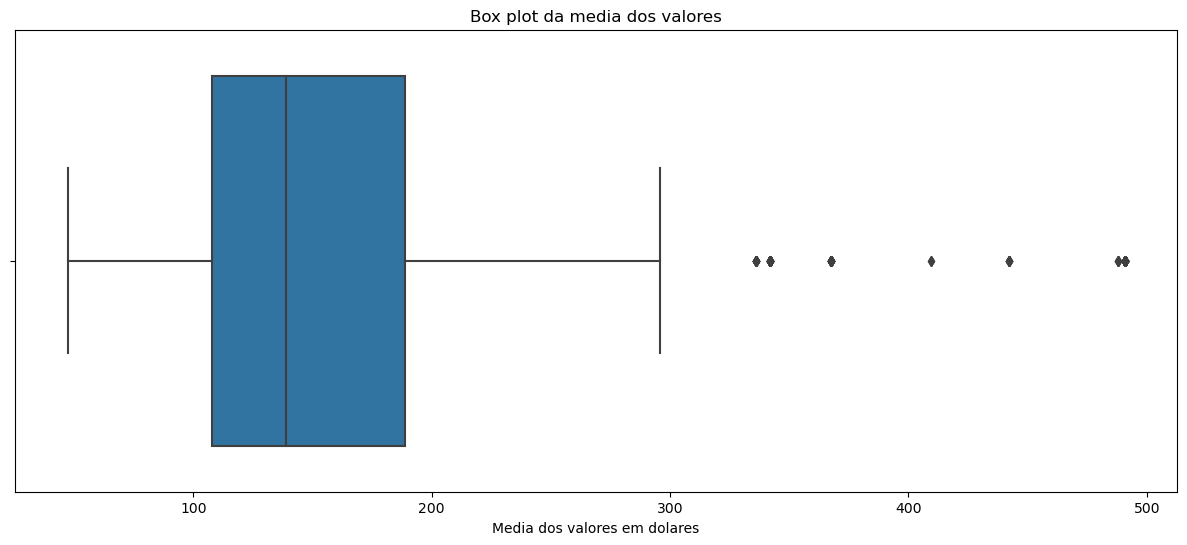

In [114]:
plt.figure(figsize=(15,6))
sns.boxplot(data = X, x ='mean_bairro')
plt.title('Box plot da media dos valores')
plt.xlabel('Media dos valores em dolares')
plt.show()

Existem outliers no limite de 500 doláres

In [115]:
corr_func = X.corr()

predictor_correlation = corr_func['mean_bairro'].sort_values(ascending = False)
print(predictor_correlation)

mean_bairro                      1.000000
bairro_encoded                   0.240923
calculado_host_listings_count    0.131410
latitude                         0.130736
minimo_noites                    0.069195
disponibilidade_365             -0.044660
numero_de_reviews               -0.056470
host_id                         -0.058965
host_id                         -0.058965
id                              -0.059111
reviews_por_mes                 -0.090551
longitude                       -0.557487
Name: mean_bairro, dtype: float64


A que mais se aproxima de 1 é a bairro_encoded que nada mais é que o bairro assimilado de um inteiro que o identifica

## Utilizando O KNN

Vou utilizar esse método porque ele me dará uma ideia melhor da relação das variáveis e tornará possível o prever o preco

In [116]:
X

id    host_id  mean_bairro  bairro_encoded    host_id  latitude  \
0          2595       2845       282.72             127       2845  40.75362   
2          3831       4869       181.89              41       4869  40.68514   
3          5022       7192       133.20              61       7192  40.79851   
4          5099       7322       221.42             137       7322  40.74767   
5          5121       7356       107.79              13       7356  40.68688   
...         ...        ...          ...             ...        ...       ...   
48770  36425863   83554966       188.95             201   83554966  40.78099   
48778  36427429  257683179        93.51              77  257683179  40.75104   
48787  36438336  211644523       100.60              90  211644523  40.54179   
48793  36442252  273841667        88.92             134  273841667  40.80787   
48840  36455809   74162901        84.90              28   74162901  40.69805   

       longitude  minimo_noites  numero_de_reviews  reviews_por_mes  \
0      -73.98377              1                 45             0.38   
2      -73.95976              1                270             4.64   
3      -73.94399             10                  9             0.10   
4      -73.97500              3                 74             0.59   
5      -73.95596             45                 49             0.40   
...          ...            ...                ...              ...   
48770  -73.95366              1                  1             1.00   
48778  -73.81459              1                  1             1.00   
48787  -74.14275              1                  1             1.00   
48793  -73.92400              1                  2             2.00   
48840  -73.92801              1                  1             1.00   

       calculado_host_listings_count  disponibilidade_365  
0                                  2                  355  
2                                  1                  194  
3                                  1                    0  
4                                  1                  129  
5                                  1                    0  
...                              ...                  ...  
48770                              1                  147  
48778                              6                  339  
48787                              1                   87  
48793                              1                   40  
48840                              1                    1  

[38810 rows x 12 columns]

In [117]:
y

0        225
2         89
3         80
4        200
5         60
        ... 
48770    129
48778     45
48787    235
48793    100
48840     30
Name: price, Length: 38810, dtype: int64

In [118]:
X_train,X_test, y_train,y_test = train_test_split(X, y, random_state=0)

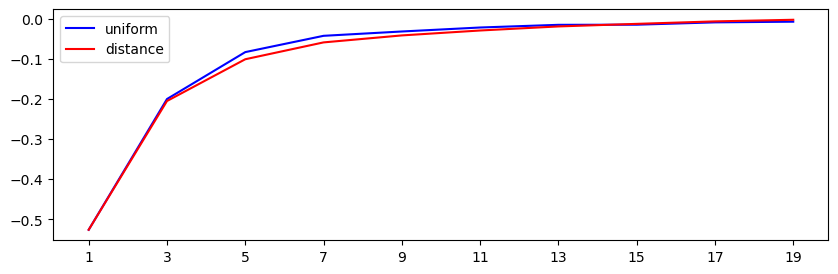

In [119]:
#preciso fazer hipoteses sobre o melhor numero de vizinhos, k
#assim como a distância entre eles
uniform = []
distance = []
r = range(1,21,2)

for k in r:
      #distancia euclidiana
      model = KNeighborsRegressor(n_neighbors=k, weights='uniform')
      model.fit(X_train.values, y_train.values)
      uniform.append(model.score(X_test.values, y_test.values))

      #distancia que é inversamente proporcioanal
      model = KNeighborsRegressor(n_neighbors=k, weights='distance')
      model.fit(X_train.values, y_train.values)
      distance.append(model.score(X_test.values, y_test.values))

uniform = np.array(uniform)
distance = np.array(distance)

plt.rcParams['figure.figsize'] = [10, 3]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.plot(r,uniform,label='uniform',color='blue')
plt.plot(r,distance,label='distance',color='red')
plt.legend()
plt.gca().set_xticks(r)
plt.show()

# testando o gridSearchCV

In [120]:
scoring = {'r2': make_scorer(r2_score),
           'mse': make_scorer(mean_squared_error)
}
params = {'n_neighbors': range(1,200,2), 'weights': ['uniform', 'distance']
}
knn_reg = KNeighborsRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=21)

grid_search = GridSearchCV(knn_reg, params, cv =5, scoring = scoring, refit= 'r2')
grid_search.fit(X_train, y_train)

# Print the best parameters and scores
print("Best parameters:", grid_search.best_params_)
print("Best scores (R^2):", grid_search.best_score_)

# Get the best estimator
best_estimator = grid_search.best_estimator_

# Predict on the testing set using the best estimator
y_pred = best_estimator.predict(X_test)

# Calculate the R^2 score and MSE on the testing set
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Test R^2:", r2)
print("Test MSE:", mse)


Best parameters: {'n_neighbors': 199, 'weights': 'uniform'}
Best scores (R^2): 0.0013541366463259764
Test R^2: 0.0019587202897576317
Test MSE: 45614.18612213614


In [121]:
model = GridSearchCV(KNeighborsRegressor(),params, cv = 5)
model.fit(X_train.values, y_train.values)
model.best_params_

{'n_neighbors': 199, 'weights': 'uniform'}

In [122]:
model.score(X_test.values, y_test.values)

0.0019587202897576317

In [125]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)

In [126]:
X_poly

array([[1.00000000e+00, 2.59500000e+03, 2.84500000e+03, ...,
        4.00000000e+00, 7.10000000e+02, 1.26025000e+05],
       [1.00000000e+00, 3.83100000e+03, 4.86900000e+03, ...,
        1.00000000e+00, 1.94000000e+02, 3.76360000e+04],
       [1.00000000e+00, 5.02200000e+03, 7.19200000e+03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 3.64383360e+07, 2.11644523e+08, ...,
        1.00000000e+00, 8.70000000e+01, 7.56900000e+03],
       [1.00000000e+00, 3.64422520e+07, 2.73841667e+08, ...,
        1.00000000e+00, 4.00000000e+01, 1.60000000e+03],
       [1.00000000e+00, 3.64558090e+07, 7.41629010e+07, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

#### Testando outro hiperparâmetros

In [127]:
param_grid = {
    'n_neighbors': [5, 10, 50, 100, 200],
    'weights': ['uniform', 'distance']
}

knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='r2')
grid_search.fit(X_poly, y)

print("Best parameters:", grid_search.best_params_)
print("Best R^2 score:", grid_search.best_score_)

Best parameters: {'n_neighbors': 200, 'weights': 'distance'}
Best R^2 score: -0.010085620995822265


### Tentando melhorar a acurácia do modelo, colocarei a variável X em escala

In [128]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.69225626, -0.84640805,  2.21246535, ..., -0.59107629,
        -0.12037923,  1.8538279 ],
       [-1.69214069, -0.84638139,  0.53073126, ...,  1.94423651,
        -0.15839291,  0.61086476],
       [-1.69202932, -0.84635078, -0.28136468, ..., -0.75771657,
        -0.15839291, -0.88686722],
       ...,
       [ 1.71466345,  1.94190924, -0.82509701, ..., -0.22208711,
        -0.15839291, -0.21520391],
       [ 1.71502962,  2.76133845, -1.01990664, ...,  0.37305674,
        -0.15839291, -0.5780565 ],
       [ 1.71629726,  0.13062902, -1.08695584, ..., -0.22208711,
        -0.15839291, -0.87914695]])

In [129]:

param_grid = {
    'n_neighbors': [5, 10, 50, 100, 200],
    'weights': ['uniform', 'distance']
}

knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='r2')
grid_search.fit(X_scaled, y)

print("Best parameters:", grid_search.best_params_)
print("Best R^2 score:", grid_search.best_score_)


Best parameters: {'n_neighbors': 200, 'weights': 'distance'}
Best R^2 score: 0.09501210666856738


In [ ]:
scores = cross_val_score()